## Clustering Assignment

#### Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

### Objective
1. To categorise the countries using some socio-economic and health factors that determine the overall development of the country. 
2. To suggest the countries which the CEO needs to focus on the most. 

In [1]:
#importing all necessary libraries here.
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import hierarchical

from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### EDA Steps
1. Load & Inspect Data
2. Format/Convert data types
3. Add derived columns as required.
4. Univariate/Bivariate Analysis.
5. Correlation between features.

In [2]:
#Load and inspect data
country_df = pd.read_csv('Country-data.csv')
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [3]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Data Conversion
- There is no need for formatting or converting datatypes here, since all data are numerical
- However, the values for exports/health/emports are in terms of percentage of gdpp
- These should be converted to actual values, otherwise would have skewed values when scaled.


In [4]:

country_df['exports_total'] = country_df['exports'] * country_df['gdpp'] // 100 
country_df['health_total'] = country_df['health'] * country_df['gdpp'] // 100
country_df['imports_total'] = country_df['imports'] * country_df['gdpp'] // 100
# The values are rounded off to integer values, since decimal accuracy are not needed for clustering.
country_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_total,health_total,imports_total
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,55.0,41.0,248.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1145.0,267.0,1987.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1712.0,185.0,1400.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2199.0,100.0,1514.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,5551.0,735.0,7185.0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1946.0,834.0,1648.0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,669.0,141.0,1458.0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,10276.0,4530.0,10847.0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,24059.0,5159.0,22418.0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,3171.0,343.0,1208.0


In [5]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_total,health_total,imports_total
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,7420.185629,1056.209581,6587.892216
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,17973.945373,1801.434338,14710.874894
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,1.000000,12.000000,0.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,447.000000,78.000000,640.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1777.000000,321.000000,2045.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7277.500000,976.500000,7719.500000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,183750.000000,8663.000000,149100.000000


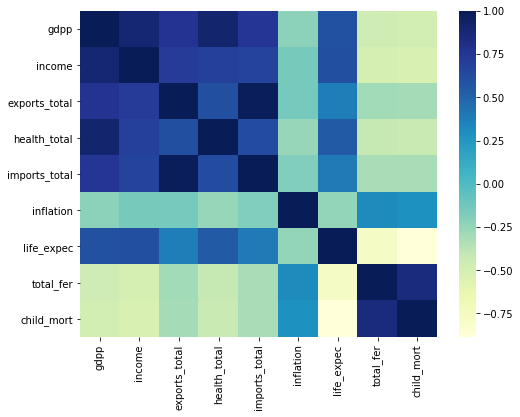

In [6]:
# Let's see the correlation of the columns to see what are some independent variables.
features = ['gdpp', 'income', 'exports_total', 'health_total', 'imports_total', 'inflation', 'life_expec', 'total_fer', 'child_mort']
corr_mat = country_df[features].corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr_mat, annot=False, cmap='YlGnBu')
plt.show()

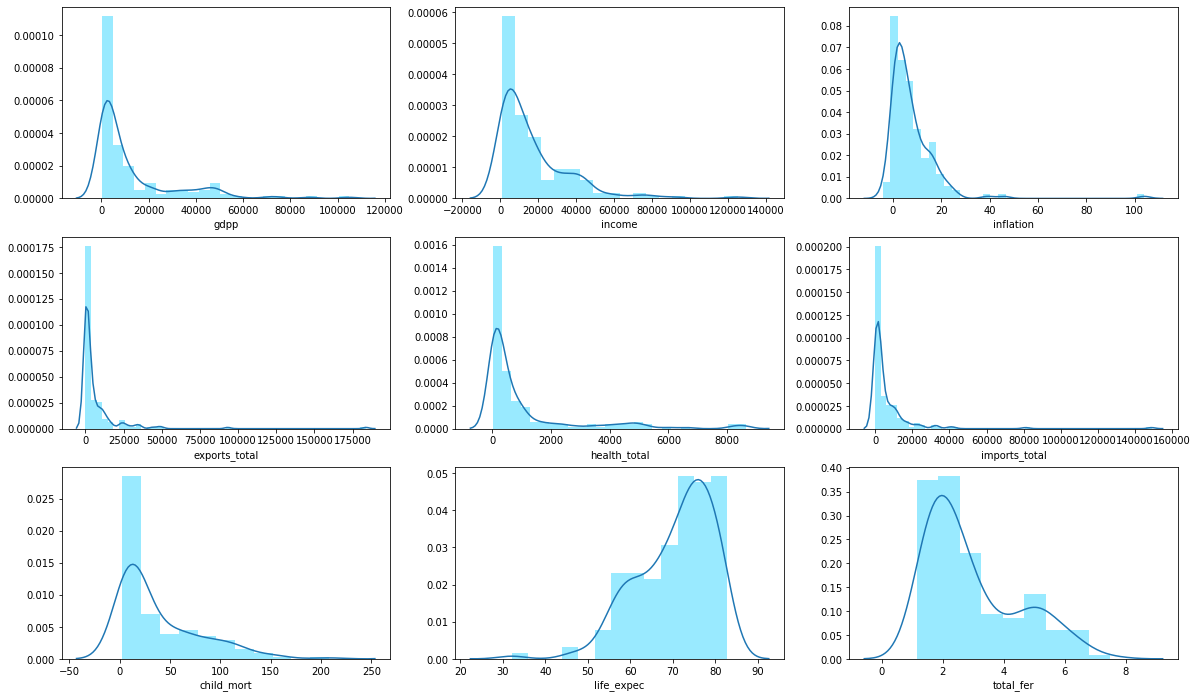

In [7]:
# We will use Distribution Plots to visualize the data distribution.
plt.figure(figsize=(20,12))
features = ['gdpp', 'income', 'inflation', 'exports_total', 'health_total', 'imports_total', 'child_mort', 'life_expec', 'total_fer']
for i in enumerate(features):    
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(country_df[i[1]], kde=True,  hist_kws={"color": "#00CCFF"})

The feature distributions are highly skewed to the left, except life expectancy which is right skewed. 

Since most of the features related to gdpp are skewed towards zero, which may indicate that the dataset had more countries from the underdeveloped nations than developing or developed countries.
\[ We can achieve a normal distribution for the feature if we obtain the log values instead. But that may make the algorithms unstable and give a skewed outcome. So we will not do that here. \]

Interestingly the life expectancy is skewed to the right, which means that most of the countries have a higher life expectancy regardless of the development status.

### Data Preparation
1. Outlier Observation
2. Outlier Treatments (if any)
3. Hopkins Check

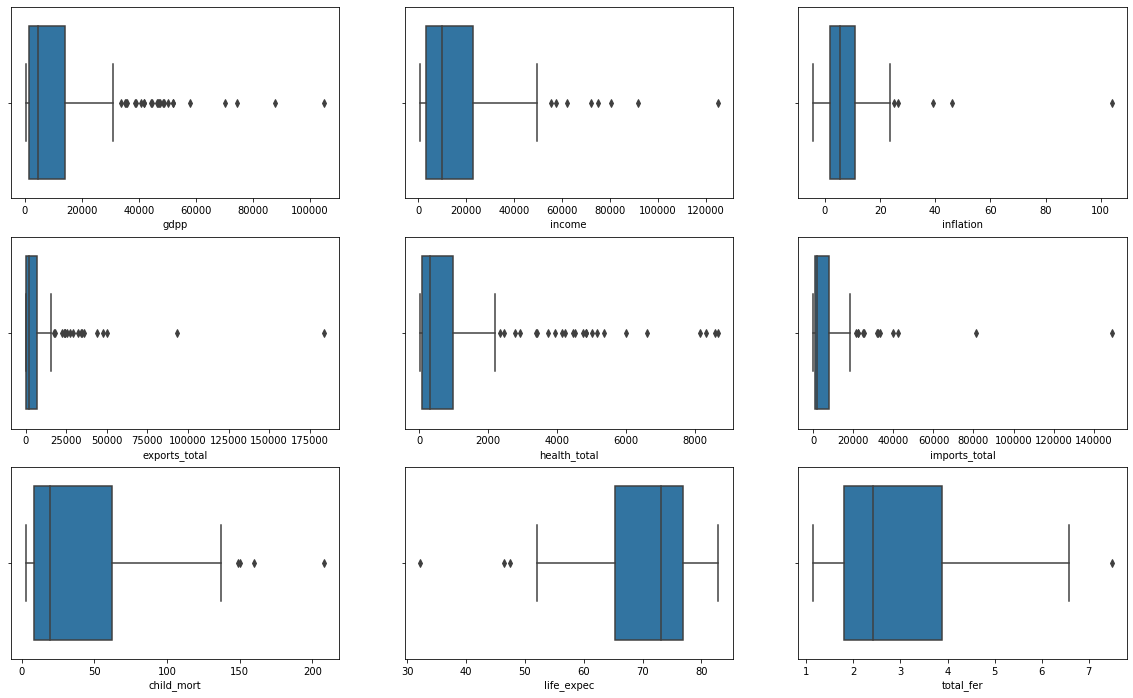

In [8]:
# We will use Box Plots to visualize data for univariate analysis
plt.figure(figsize=(20,12))
features = ['gdpp', 'income', 'inflation', 'exports_total', 'health_total', 'imports_total', 'child_mort', 'life_expec', 'total_fer']
for i in enumerate(features): 
    ax = plt.subplot(3, 3, i[0]+1)
    sns.boxplot(country_df[i[1]])

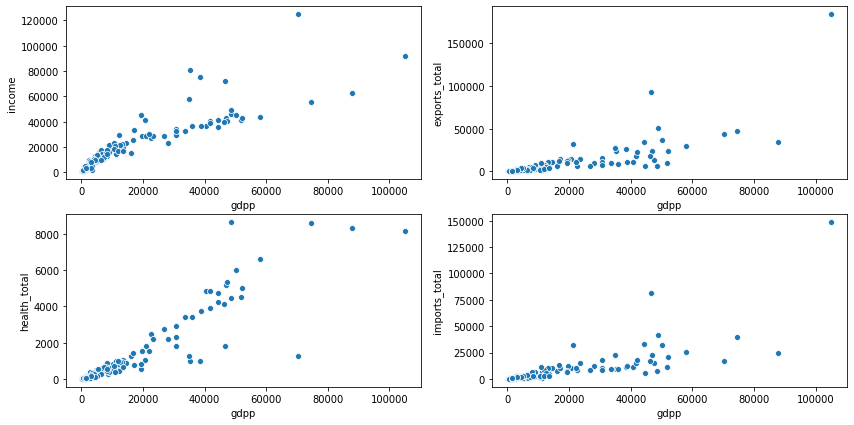

In [9]:
plt.figure(figsize=(14,7))
features = ['income', 'exports_total', 'health_total', 'imports_total']
for i in enumerate(features): 
    ax = plt.subplot(2, 2, i[0]+1)
    sns.scatterplot(country_df['gdpp'], country_df[i[1]])

### Capping
The graph above shows that these values are highly correlated, and hence all these values should be equivalently spread out towards the end of spectrum.

We take a decission on capping these values with values inferred from graph to pack the clusters a bit closer. Let's do this only for the gdpp related features and for higher values only. The reason behind this is we know that we need to determine countries requireing aid, a general notion would be that countries with higher gdpp parameters may not be figuring in the list anyway.

We would also cap the 'Inflation' value similarly, and assume anything beyond 20% as 20, since its already a high number.

In [10]:
# The absolute values below are picked from the graphs above, and we are trying to pack the points closer.
# We are not taking values from IQR intentionally.
country_df['gdpp'][country_df['gdpp'] >= 55000] = 55000
country_df['income'][country_df['income'] >= 60000] = 60000
country_df['exports_total'][country_df['exports_total'] >= 50000] = 50000
country_df['health_total'][country_df['health_total'] >= 6000] = 6000
country_df['imports_total'][country_df['imports_total'] >= 50000] = 50000
country_df['inflation'][country_df['inflation'] >= 20] = 20

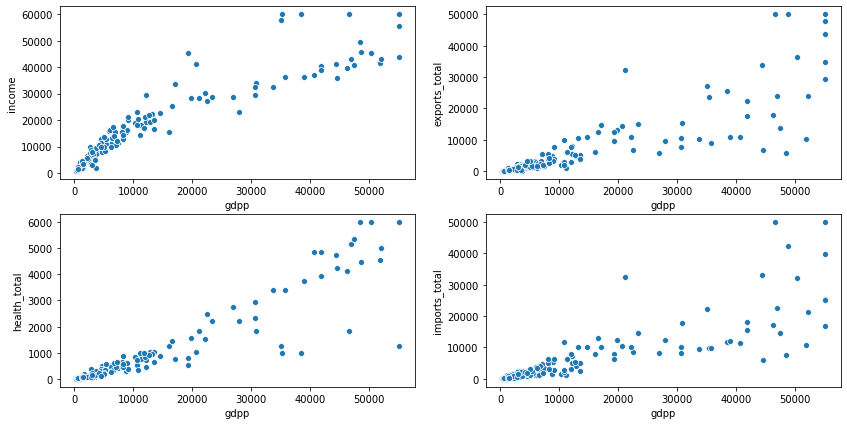

In [11]:
# Running the plots again to see the effect of capping.
plt.figure(figsize=(14,7))
features = ['income', 'exports_total', 'health_total', 'imports_total']
for i in enumerate(features): 
    ax = plt.subplot(2, 2, i[0]+1)
    sns.scatterplot(country_df['gdpp'], country_df[i[1]])

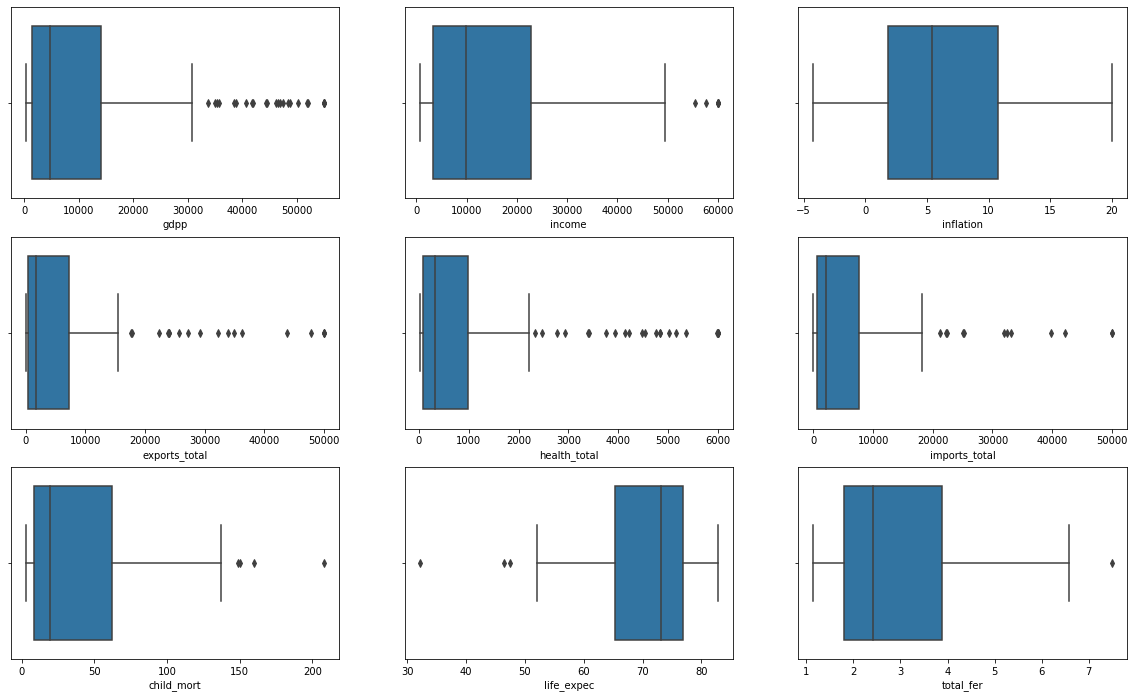

In [12]:
# We will use Box Plots to visualize data for univariate analysis
plt.figure(figsize=(20,12))
features = ['gdpp', 'income', 'inflation', 'exports_total', 'health_total', 'imports_total', 'child_mort', 'life_expec', 'total_fer']
for i in enumerate(features): 
    ax = plt.subplot(3, 3, i[0]+1)
    sns.boxplot(country_df[i[1]])

At this point we also see outliers at the lower end of the spectrum for 
- child_mort, 
- life_expec, 
- total_fer

But since these paraemters may be critical for determining our subset of countries, we letting these outliers be.
This is again an educated guess, since we think the feature values point to under developed countries who may be candidates for receiving aid.

### Hopkins Statistics
Let's now determine if the dataset is good enough for clustering, by using Hopkin's measure.

In [13]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [14]:
# Hopkins Statistic Value
# Note: The country or index column is dropped, and the other columns are not used, instead the correspinding total columns are used.
# We are calculating the hopkins measure with only the columns that could be used for clustering.
hopkins(country_df.drop(['country', 'exports', 'imports', 'health'], axis=1))

0.9064152727052003

Based on the hopkins measure above, the data deems fit for Clustering. We will proceed with K-Means clustering next.

### K-Means Clustering
1. Prepare and scale data
2. Choose K using Elbow and Silhouette Score
3. Run K-Means with chosen K
4. Data Visualization - Clusters
5. Profiling Clusters (Plot clusters with pairs of features.)

#### Prepare & Scale

In [15]:
scaler = StandardScaler()
# We will drop the unused columns again during scaling.
# Note: The country or index column is dropped, and the columns exports/imports/health are not used, instead the correspinding '_total' columns are used.
scaled_country_df = scaler.fit_transform(country_df.drop(['country', 'exports', 'imports', 'health'], axis=1)) 

#### Elbow Method to choose K

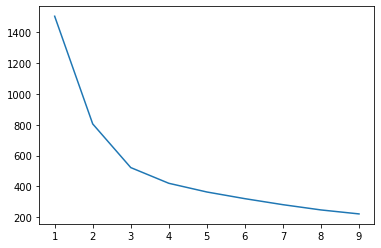

In [16]:
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(scaled_country_df)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

#### Silhouette Score

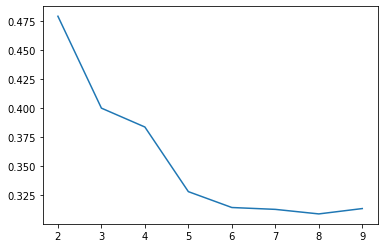

In [17]:
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k, random_state=20).fit(scaled_country_df)
    ss.append([k, silhouette_score(scaled_country_df, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

Based on both the elbox curve and silhouette score analysis, k = 3, seems to be the optimum choice of clusters for k-means.
It should also be noted that, using Silhouette score, even k = 2, option looks viable too.

#### Run k-means clustering \[K = 3\]

In [18]:
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 20)
kmean.fit(scaled_country_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=20, tol=0.0001, verbose=0)

In [19]:
#Adding the cluster IDs to the original dataframe.
country_df = pd.concat([country_df, pd.Series(data=kmean.labels_, name='kmeans_clusterid')], axis = 1)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_total,health_total,imports_total,kmeans_clusterid
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.0,41.0,248.0,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.0,267.0,1987.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.0,185.0,1400.0,0
3,Angola,119.0,62.3,2.85,42.9,5900,20.00,60.1,6.16,3530,2199.0,100.0,1514.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.0,735.0,7185.0,0


In [20]:
country_df['kmeans_clusterid'].value_counts()

0    89
2    48
1    30
Name: kmeans_clusterid, dtype: int64

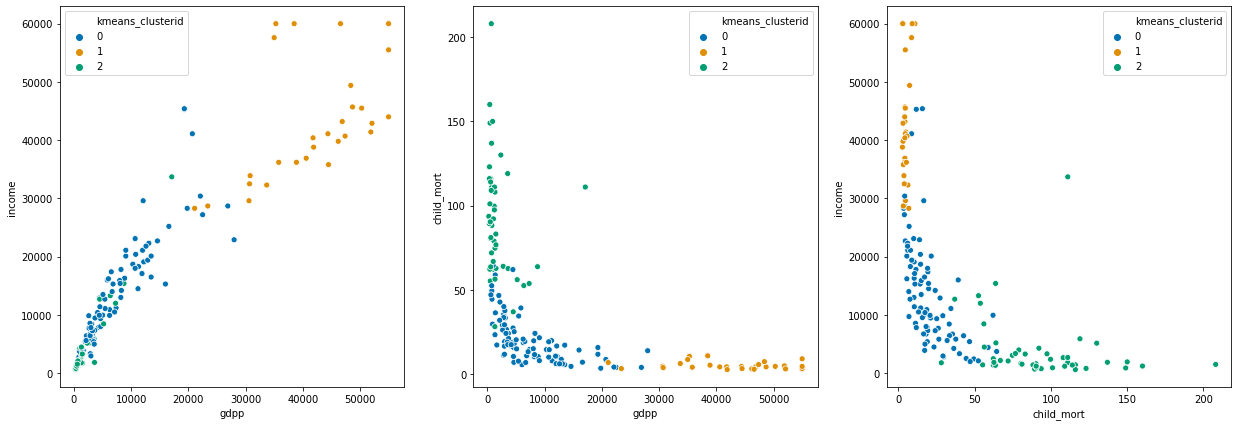

In [21]:
# Plotting the clusters with features gdpp, income, child_mort
plt.figure(figsize=(21, 7))
plt.subplot(131)
sns.scatterplot(data = country_df, x = 'gdpp', y = 'income', hue ='kmeans_clusterid', legend = 'full', palette='colorblind')
plt.subplot(132)
sns.scatterplot(data = country_df, x = 'gdpp', y = 'child_mort', hue ='kmeans_clusterid', legend = 'full', palette='colorblind')
plt.subplot(133)
sns.scatterplot(data = country_df, x = 'child_mort', y = 'income', hue ='kmeans_clusterid', legend = 'full', palette='colorblind')

plt.show()

#### Profiling Clusters

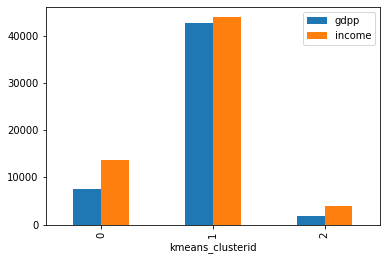

In [22]:
country_df[['kmeans_clusterid', 'gdpp', 'income']].groupby('kmeans_clusterid').mean().plot(kind = 'bar')

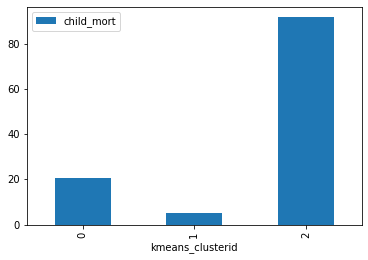

In [23]:
country_df[['kmeans_clusterid', 'child_mort']].groupby('kmeans_clusterid').mean().plot(kind = 'bar')

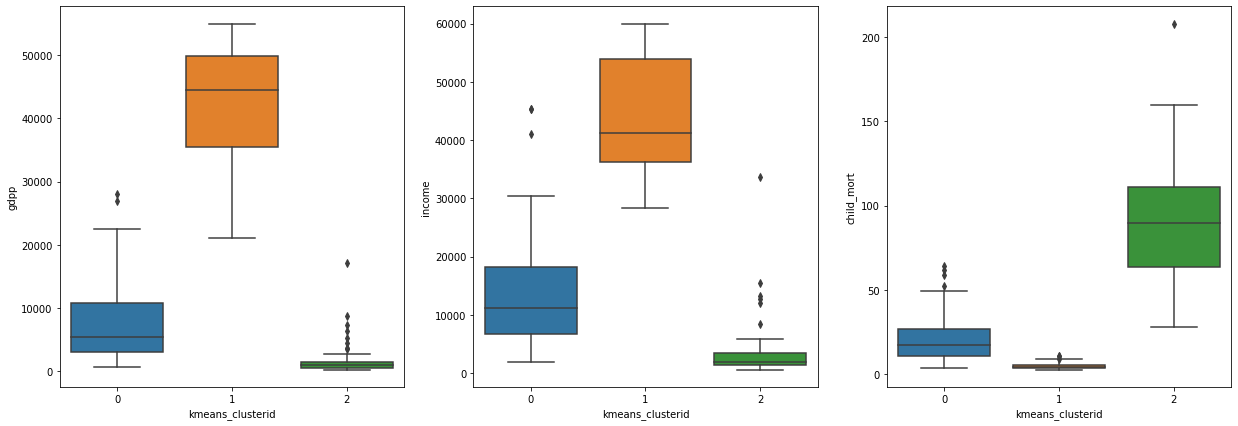

In [24]:
plt.figure(figsize=(21,7))
plt.subplot(131)
sns.boxplot(x='kmeans_clusterid', y='gdpp', data=country_df[['kmeans_clusterid', 'gdpp']])
plt.subplot(132)
sns.boxplot(x='kmeans_clusterid', y='income', data=country_df[['kmeans_clusterid', 'income']])
plt.subplot(133)
sns.boxplot(x='kmeans_clusterid', y='child_mort', data=country_df[['kmeans_clusterid', 'child_mort']])
plt.show()

#### Profiling - Outcome
The above plots clearly define the 3 categories obtained through k-means clustering.

- Cluster 0: Has average gdpp/income with mid level child mortality rate.
- Cluster 1: Group of developed nations with very high gdpp/income with very low child mortality.
- Cluster 2: This cluster has high child mortality rate with low gdpp/income. There are quite a few outliers here though in regards to gdpp, which tells us that the child mortality rate is a significant factor for this cluster.

In [25]:
# The top 5 countries (for aid) from this clustering method can be obtained by sorting cluster 2 with decreasing child mortality rate and increasing gdpp
country_df[country_df['kmeans_clusterid']==2].sort_values(by=["child_mort", 'gdpp'], ascending=[False, True])[['country', 'child_mort', 'gdpp', 'income']].head(5)

,country,child_mort,gdpp,income
66,Haiti,208.0,662,1500
132,Sierra Leone,160.0,399,1220
32,Chad,150.0,897,1930
31,Central African Republic,149.0,446,888
97,Mali,137.0,708,1870


### Hierarchical Clustering
1. Try Hierarchical Clustering with Single/Complete Linkage
2. Choose one linkage method
3. Data Visualization - Clusters
4. Profiling Clusters

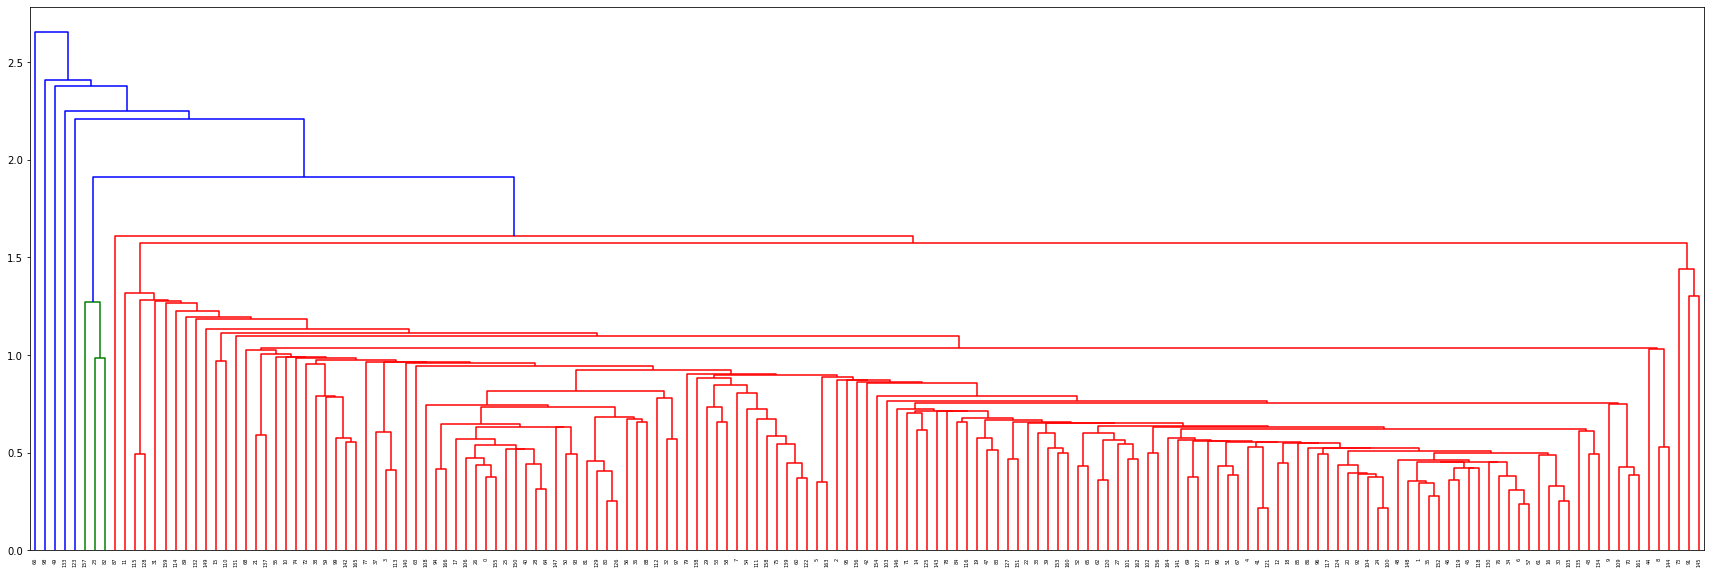

In [26]:
#Hierarchical clustering with single linkage.
plt.figure(figsize=(30, 10))
linkages = linkage(scaled_country_df, method="single", metric='euclidean')
dendrogram(linkages)
plt.show()

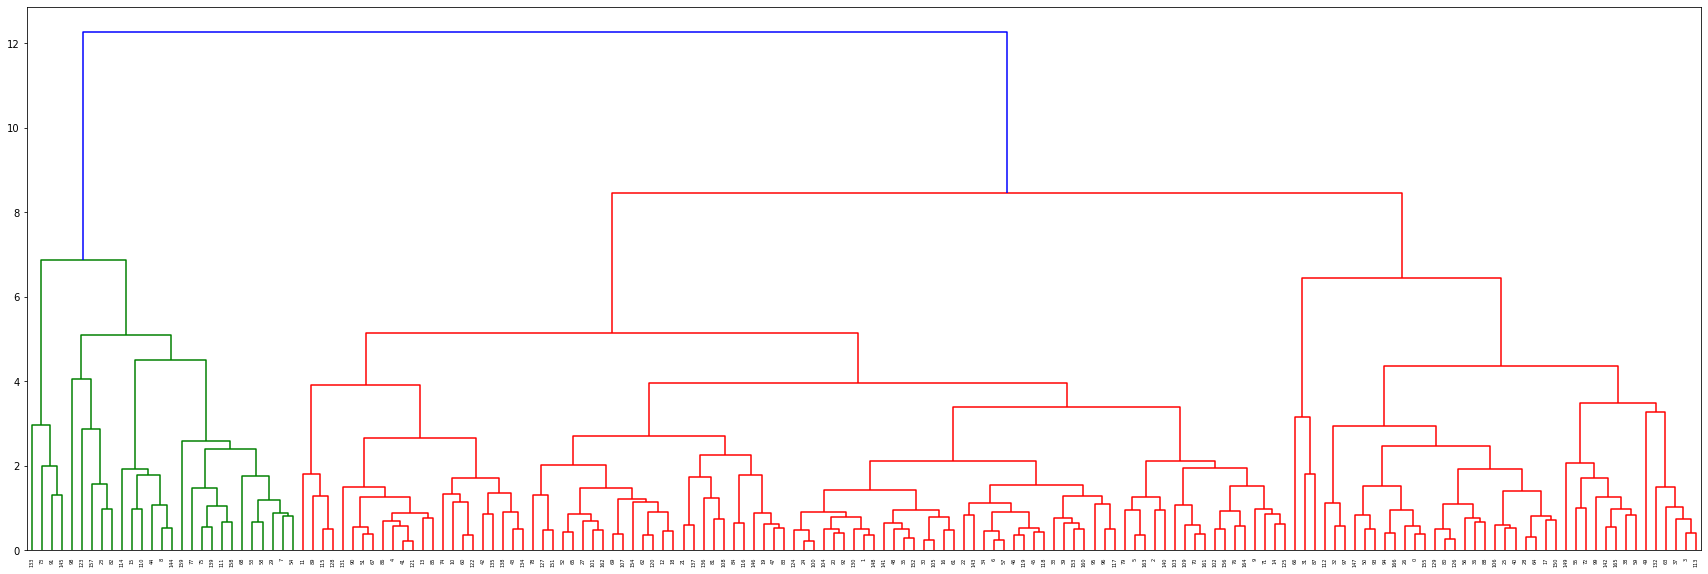

In [27]:
#Hierarchical clustering with single linkage.
plt.figure(figsize=(30, 10))
linkages = linkage(scaled_country_df, method="complete", metric='euclidean')
dendrogram(linkages)
plt.show()

As we observe from the above 2 dendrograms, single linkage method does not clearly imply any clustering. Although there are smaller groups at one side of the dendrogram.
The dendrogram with complete linkage looks good for hierarchical clustering, as it has clearly segregated clusters. With 8 features, it gives us 3 groups and with 6 features it gives 5 clusters. This is similar to the finding from k-means preprocessing.

We will use cut_tree to get our list of features and k=3.

#### Run Hierarchical clustering \[K = 3\]

In [28]:
cluster_labels = cut_tree(linkages, n_clusters=3).reshape(-1,)
country_df['hierarchical_clusterid'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_total,health_total,imports_total,kmeans_clusterid,hierarchical_clusterid
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.0,41.0,248.0,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.0,267.0,1987.0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.0,185.0,1400.0,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,20.00,60.1,6.16,3530,2199.0,100.0,1514.0,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.0,735.0,7185.0,0,1


In [29]:
country_df['hierarchical_clusterid'].value_counts()

1    99
0    41
2    27
Name: hierarchical_clusterid, dtype: int64

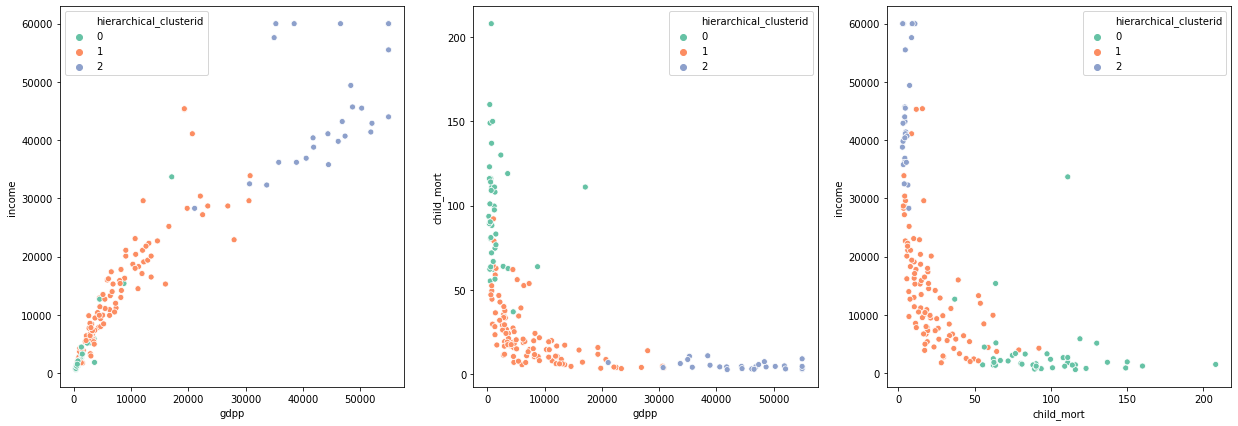

In [30]:
# Plotting the clusters with features gdpp, income, child_mort
plt.figure(figsize=(21, 7))
plt.subplot(131)
sns.scatterplot(data = country_df, x = 'gdpp', y = 'income', hue ='hierarchical_clusterid', legend = 'full', palette='Set2')
plt.subplot(132)
sns.scatterplot(data = country_df, x = 'gdpp', y = 'child_mort', hue ='hierarchical_clusterid', legend = 'full', palette='Set2')
plt.subplot(133)
sns.scatterplot(data = country_df, x = 'child_mort', y = 'income', hue ='hierarchical_clusterid', legend = 'full', palette='Set2')

plt.show()

#### Profiling Hierarchical Clusters

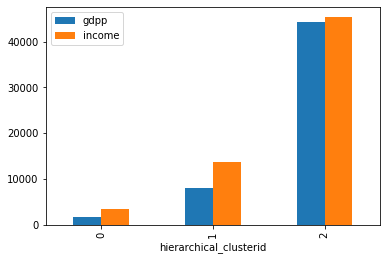

In [31]:
country_df[['hierarchical_clusterid', 'gdpp', 'income']].groupby('hierarchical_clusterid').mean().plot(kind = 'bar')

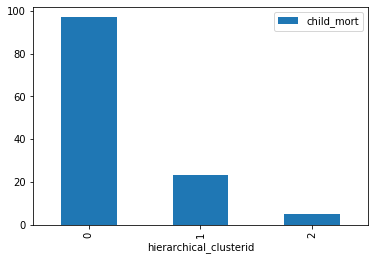

In [32]:
country_df[['hierarchical_clusterid', 'child_mort']].groupby('hierarchical_clusterid').mean().plot(kind = 'bar')

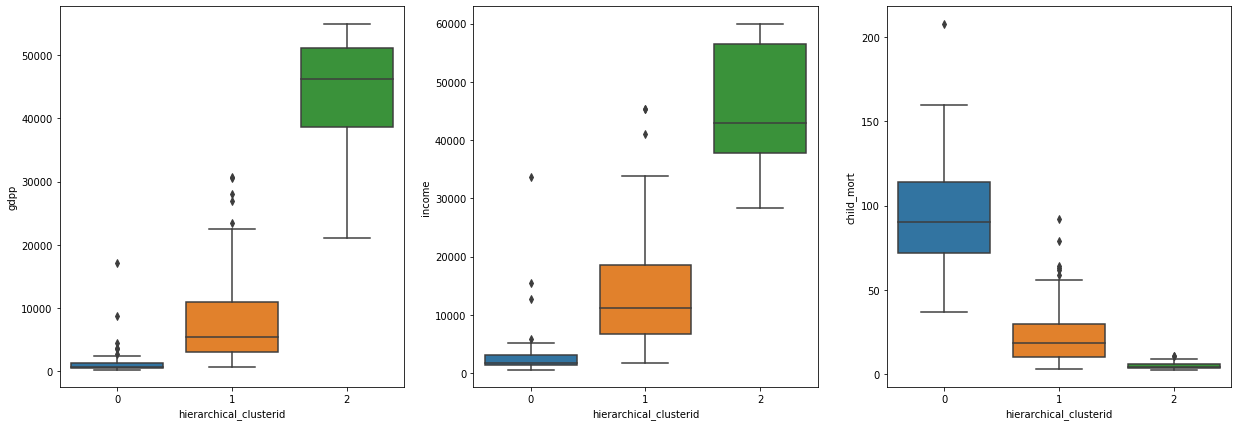

In [33]:
plt.figure(figsize=(21,7))
plt.subplot(131)
sns.boxplot(x='hierarchical_clusterid', y='gdpp', data=country_df[['hierarchical_clusterid', 'gdpp']])
plt.subplot(132)
sns.boxplot(x='hierarchical_clusterid', y='income', data=country_df[['hierarchical_clusterid', 'income']])
plt.subplot(133)
sns.boxplot(x='hierarchical_clusterid', y='child_mort', data=country_df[['hierarchical_clusterid', 'child_mort']])
plt.show()

#### Profiling - Outcome
The above plots clearly defeine the 3 categories obtained through hierarchical clustering. This clustering method produced almost similar results as k-means clustering, although there are some shifts between clusters. However the edge cases remain the same which mean the outcome may remain similar.

- Cluster 0: This cluster has high child mortality rate with low gdpp/income. There are quite a few outliers here though in regards to gdpp, which tells us that the child mortality rate is a significant factor for this cluster.
- Cluster 1: Has average gdpp/income with mid level child mortality rate.
- Cluster 2: Tends to developed nations with very high gdpp/income with very low child mortality.

In [34]:
# The top 5 countries from this clustering method can be obtained by sorting cluster 2 with decreasing child mortality rate and increasing gdpp
# We will also prefilter the countries within this cluster with child mortality higher than 100, gdpp less than 1000 and income less than 2000. 
country_df[(country_df['hierarchical_clusterid']==0) & (country_df['child_mort'] >= 100) & (country_df['gdpp'] <= 1000) & (country_df['income'] <= 1500)].sort_values(by=["child_mort", 'gdpp'], ascending=[False, True])[['country', 'child_mort', 'gdpp', 'income']].head(5)

,country,child_mort,gdpp,income
66,Haiti,208.0,662,1500
132,Sierra Leone,160.0,399,1220
31,Central African Republic,149.0,446,888
112,Niger,123.0,348,814
37,"Congo, Dem. Rep.",116.0,334,609


### Final Analysis
1. Publish the classifications obtained for the countries.
2. Choose a cluster/clusters that should be preferred for aid, based on the socio-economic/health factors.

Both our analysis with k-means clustering and hierarchical clustering methods produced the same set of clusters.
The clusters are mostly signified by the child mortality rate and gdpp. We get 3 clusters as below:
 - High GDPP/Low Child Mortality 
 - Average GDPP/Average Child Mortality
 - Low GDPP/High Child Mortality

From this we selected the 3rd group with Low GDPP/High Child Mortality to be considered for aid since the countries seem more vulnerable.
Further we took the countries with highest mortality rates with low GDPP to determine the best 5 candidate countries to receive the aid. The country list is given below from the hierarchical clusering output.

In [35]:
# The top 5 countries from this clustering method can be obtained by sorting cluster 2 with decreasing child mortality rate and increasing gdpp
country_df[(country_df['hierarchical_clusterid']==0) & 
            (country_df['child_mort'] >= 100) & 
            (country_df['gdpp'] <= 1000) & 
            (country_df['income'] <= 1500)].sort_values(by=["child_mort", 'gdpp'], ascending=[False, True])[['country']].head(5)

,country
66,Haiti
132,Sierra Leone
31,Central African Republic
112,Niger
37,"Congo, Dem. Rep."
